In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns

In [2]:
df_jan = pd.read_parquet('fhv_tripdata_2021-01.parquet')


In [3]:
df_jan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [4]:
df_jan.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               958267
DOlocationID               162220
SR_Flag                   1154112
Affiliated_base_number        885
dtype: int64

In [5]:
df_jan

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


In [6]:
df_jan[['pickup_datetime', 'dropOff_datetime']]

,pickup_datetime,dropOff_datetime
0,2021-01-01 00:27:00,2021-01-01 00:44:00
1,2021-01-01 00:50:00,2021-01-01 01:07:00
2,2021-01-01 00:01:00,2021-01-01 01:51:00
3,2021-01-01 00:13:09,2021-01-01 00:21:26
4,2021-01-01 00:38:31,2021-01-01 00:53:44
...,...,...
1154107,2021-01-31 23:43:03,2021-01-31 23:51:48
1154108,2021-01-31 23:50:27,2021-02-01 00:48:03
1154109,2021-01-31 23:13:46,2021-01-31 23:29:58
1154110,2021-01-31 23:58:03,2021-02-01 00:17:29


In [7]:
df_jan['duration'] = df_jan.dropOff_datetime - df_jan.pickup_datetime
df_jan.duration = df_jan.duration.apply(lambda td: td.total_seconds() / 60)

In [8]:
df_jan.duration.mean()

19.1672240937939

In [9]:
df_jan.describe()

,PUlocationID,DOlocationID,duration
count,195845.000000,991892.000000,1.154112e+06
mean,139.859690,135.898030,1.916722e+01
std,74.991382,80.474902,3.986922e+02
min,1.000000,1.000000,1.666667e-02
25%,75.000000,67.000000,7.766667e+00
50%,143.000000,132.000000,1.340000e+01
75%,206.000000,213.000000,2.228333e+01
max,265.000000,265.000000,4.233710e+05


In [10]:
df_jan.count()


dispatching_base_num      1154112
pickup_datetime           1154112
dropOff_datetime          1154112
PUlocationID               195845
DOlocationID               991892
SR_Flag                         0
Affiliated_base_number    1153227
duration                  1154112
dtype: int64

In [11]:
df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]

In [12]:
df_jan.describe()

,PUlocationID,DOlocationID,duration
count,182818.000000,961919.000000,1.109826e+06
mean,139.861633,135.689147,1.624725e+01
std,74.763788,80.349678,1.155150e+01
min,1.000000,1.000000,1.000000e+00
25%,75.000000,67.000000,7.850000e+00
50%,146.000000,132.000000,1.323333e+01
75%,206.000000,213.000000,2.146667e+01
max,265.000000,265.000000,6.000000e+01


In [13]:
df_jan.describe()

,PUlocationID,DOlocationID,duration
count,182818.000000,961919.000000,1.109826e+06
mean,139.861633,135.689147,1.624725e+01
std,74.763788,80.349678,1.155150e+01
min,1.000000,1.000000,1.000000e+00
25%,75.000000,67.000000,7.850000e+00
50%,146.000000,132.000000,1.323333e+01
75%,206.000000,213.000000,2.146667e+01
max,265.000000,265.000000,6.000000e+01


In [14]:
1154112 - 1109826

44286

In [15]:
df_jan.isnull().sum()


dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               927008
DOlocationID               147907
SR_Flag                   1109826
Affiliated_base_number        773
duration                        0
dtype: int64

In [16]:
df_jan['PUlocationID'] = df_jan['PUlocationID'].fillna(-1)
df_jan['DOlocationID'] = df_jan['DOlocationID'].fillna(-1)

C:\Users\dston\AppData\Local\Temp\ipykernel_23440\2713652444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan['PUlocationID'] = df_jan['PUlocationID'].fillna(-1)
C:\Users\dston\AppData\Local\Temp\ipykernel_23440\2713652444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan['DOlocationID'] = df_jan['DOlocationID'].fillna(-1)


In [17]:
df_jan.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID                    0
DOlocationID                    0
SR_Flag                   1109826
Affiliated_base_number        773
duration                        0
dtype: int64

In [18]:
total = 1109826
pu = 927008

print(pu/total*100)

83.52732770722618


In [19]:
categorical = ['PUlocationID', 'DOlocationID']
numerical = ['duration']

In [20]:
df_jan[categorical] = df_jan[categorical].astype(str)

C:\Users\dston\AppData\Local\Temp\ipykernel_23440\1583698975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan[categorical] = df_jan[categorical].astype(str)


In [21]:
train_dicts = df_jan[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [22]:
X_train

<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

In [23]:
target = 'duration'
y_train = df_jan[target].values

In [24]:
lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred = lin.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.528519107204405

In [25]:
df_val = pd.read_parquet('fhv_tripdata_2021-02.parquet')
df_val['duration'] = df_val.dropOff_datetime - df_val.pickup_datetime
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)
df_val = df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]
df_val[categorical] = df_val[categorical].astype(str)

In [26]:
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [27]:
y_val = df_val[target].values

In [28]:

y_pred = lin.predict(X_val)

In [29]:
mean_squared_error(y_val, y_pred, squared=False)

11.364434791756596

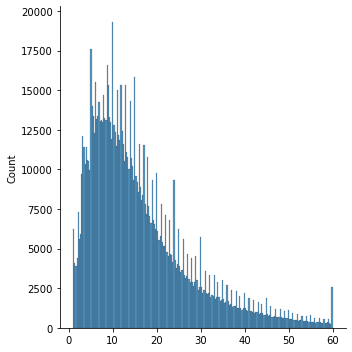

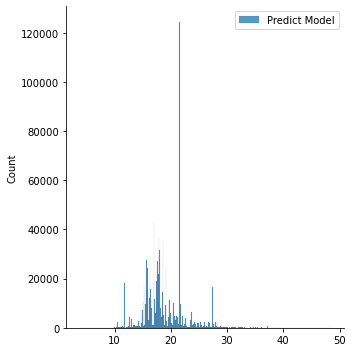

In [31]:
sns.displot(y_train, label ="Current")
sns.displot(y_pred, label ="Predict Model")
plt.legend()

In [35]:
with open('linreg.bin', 'wb') as f_out:
    pickle.dump((dv, lin), f_out)